## Vampire Diaries | Viewership Analysis

In [3]:
import os
os.getcwd()
os.chdir("C:/Users/Bhupender/Desktop/Assignments/Sem 4/RR/Assignments/vampire-diaries-report")

In [4]:
os.getcwd()

'C:\\Users\\Bhupender\\Desktop\\Assignments\\Sem 4\\RR\\Assignments\\vampire-diaries-report'

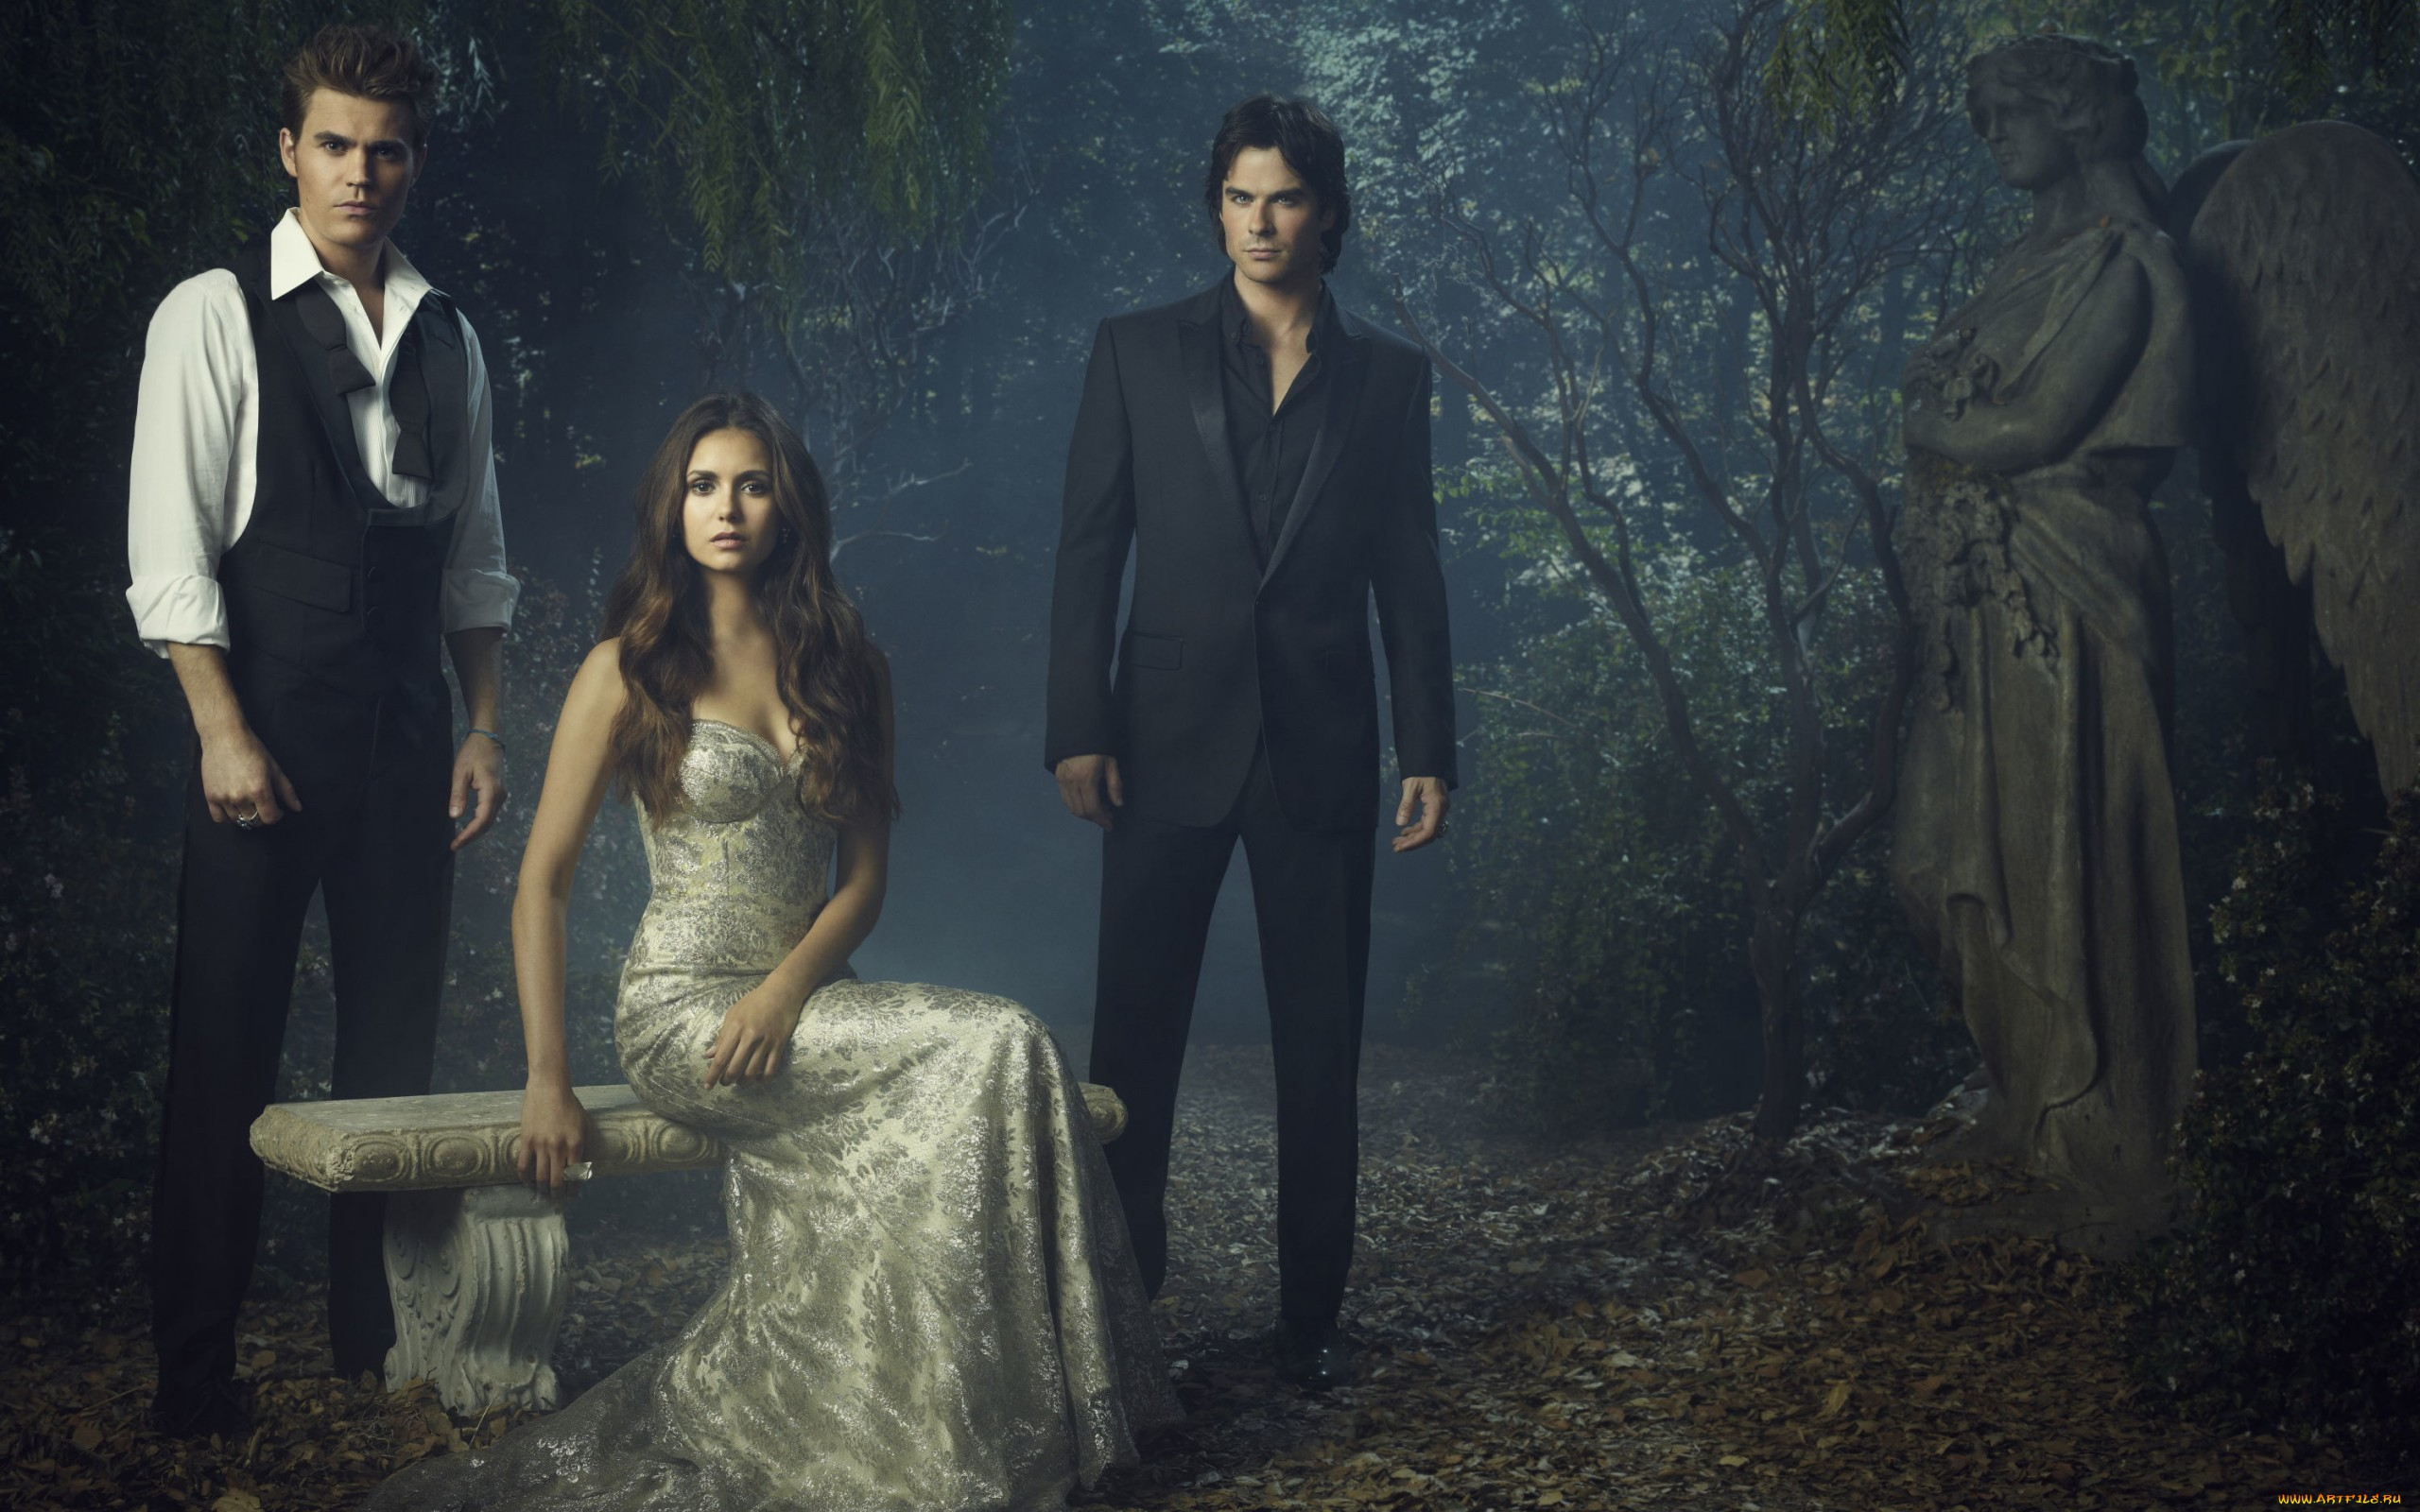

In [19]:
from IPython.display import Image
Image("456725.jpg")

In [7]:
import pandas as pd

# Load
file_path = 'Data.xlsx'
df = pd.read_excel(file_path, sheet_name='Sheet1', skiprows=1)
df.head()

,Unnamed: 0,Unnamed: 1,1,2,3,4,5,6,7,8,...,15,16,17,18,19,20,21,22,23,Unnamed: 25
0,NaN,1,4.91,3.78,3.81,3.53,3.52,3.88,4.18,4.09,...,3.33,2.80,3.48,3.15,3.33,3.39,3.31,3.47,–,3.66
1,NaN,2,3.28,3.05,3.57,3.18,3.47,3.62,3.55,3.63,...,3.07,2.98,2.73,2.81,2.70,2.68,2.84,2.86,–,3.17
2,NaN,3,3.10,2.52,2.74,2.63,2.89,3.03,3.28,3.51,...,2.90,2.64,2.69,2.44,2.21,2.22,2.54,2.53,–,2.81
3,NaN,4,3.18,2.91,2.87,3.27,3.02,2.84,2.42,2.81,...,2.91,2.41,2.65,2.46,2.14,2.24,2.17,2.28,2.24,2.64
4,NaN,5,2.59,2.14,2.93,2.63,2.07,2.59,2.72,2.67,...,2.19,2.28,1.73,1.66,1.81,1.84,1.50,1.61,–,2.23


In [8]:
# Dropping the last column adn unnamed column
df = df.iloc[:, 1:-2]

# Rename columns
episode_columns = list(range(1, df.shape[1]))  
df.columns = ['Season'] + [f'Episode_{i}' for i in episode_columns]

In [11]:
# Short to long format
df_long = df.melt(id_vars=['Season'], var_name='Episode', value_name='Viewership')

# Cleaning episode column to just numbers
df_long['Episode'] = df_long['Episode'].str.extract(r'(\d+)').astype(int)

# Remove rows with missing and sort values by season and episodes
df_long = df_long[df_long['Viewership'].apply(lambda x: str(x).replace('.', '', 1).isdigit())]
df_long['Viewership'] = df_long['Viewership'].astype(float)

df_long = df_long.sort_values(by=['Season', 'Episode']).reset_index(drop=True)

In [12]:
df_long.head()

,Season,Episode,Viewership
0,1,1,4.91
1,1,2,3.78
2,1,3,3.81
3,1,4,3.53
4,1,5,3.52


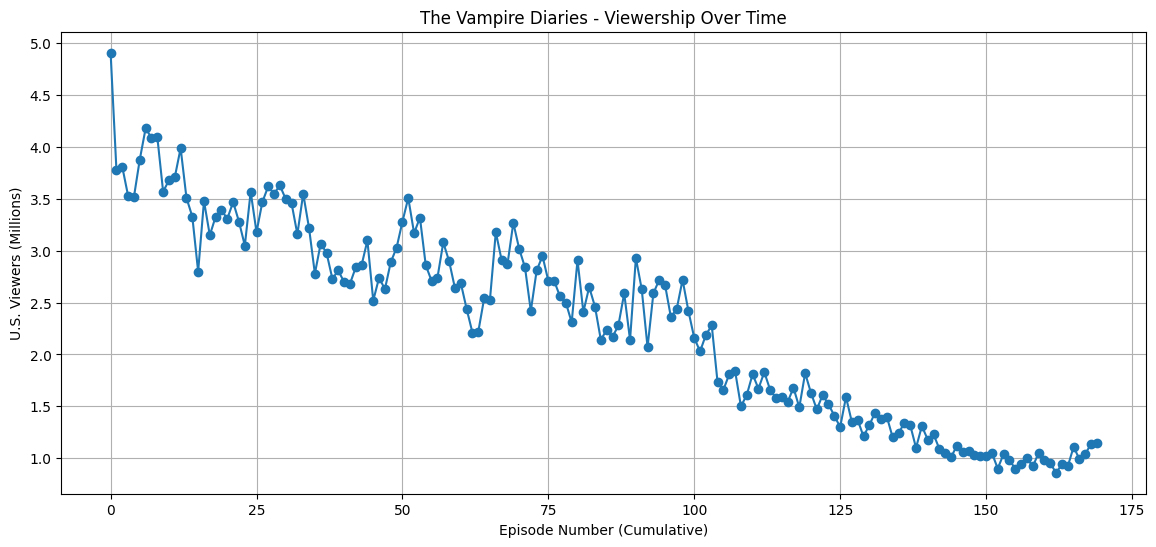

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(df_long['Viewership'], marker='o')
plt.title('The Vampire Diaries - Viewership Over Time')
plt.xlabel('Episode Number (Cumulative)')
plt.ylabel('U.S. Viewers (Millions)')
plt.grid(True)
plt.show()

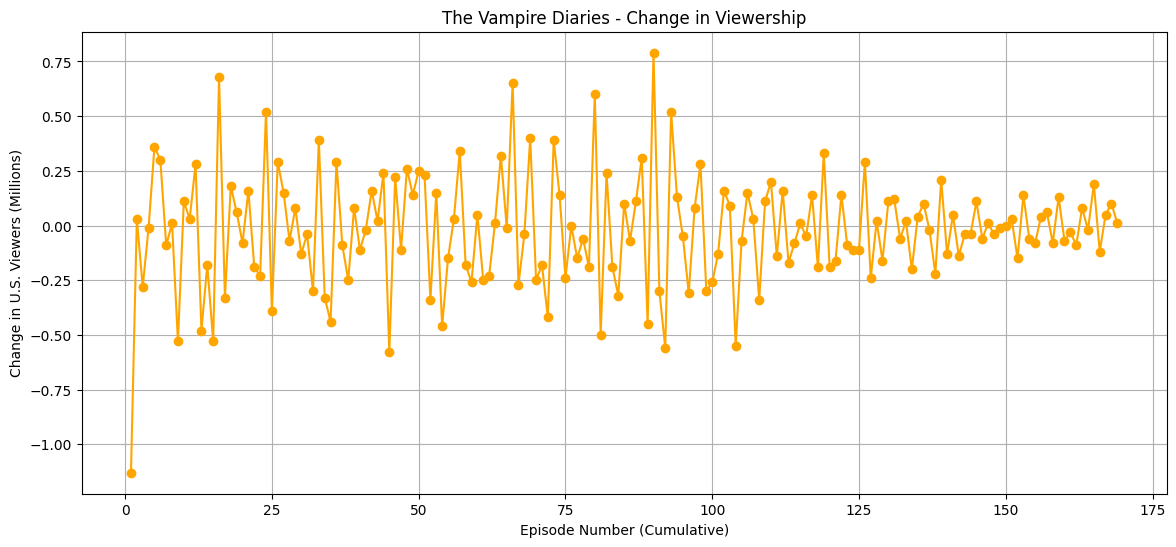

In [14]:
df_long['Viewership_Change'] = df_long['Viewership'].diff()

plt.figure(figsize=(14,6))
plt.plot(df_long['Viewership_Change'], color='orange', marker='o')
plt.title('The Vampire Diaries - Change in Viewership')
plt.xlabel('Episode Number (Cumulative)')
plt.ylabel('Change in U.S. Viewers (Millions)')
plt.grid(True)
plt.show()

In [15]:
print("Summary Statistics:")
print(df_long['Viewership'].describe())

Summary Statistics:
count    170.000000
mean       2.319353
std        0.944987
min        0.860000
25%        1.402500
50%        2.450000
75%        3.045000
max        4.910000
Name: Viewership, dtype: float64


In [16]:
season_avg = df_long.groupby('Season')['Viewership'].mean()

first_season_avg = season_avg.iloc[0]
last_season_avg = season_avg.iloc[-1]
drop_percentage = ((first_season_avg - last_season_avg) / first_season_avg) * 100

print(f"First season avg: {first_season_avg:.2f} million")
print(f"Last season avg: {last_season_avg:.2f} million")
print(f"Drop: {drop_percentage:.2f}%")

First season avg: 3.66 million
Last season avg: 0.99 million
Drop: 72.90%


The total viewership of The Vampire Diaries started strong in its initial seasons, but Season 1 averaged at about 3.66 million per episode.

It maintained decent numbers in Seasons 2 and 3 at about 3.17 million and 2.81 million average viewings. 

Between Season 1 and the final Season 8, viewership dropped from approximately 3.66 million to 0.99 million per episode — a decline of about 73% over the run of the show.